In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset (replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
dt= pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
ds= pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv')
# Assuming 'total_amount' is your target variable

In [3]:
from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit, cross_validate
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,OrdinalEncoder,MaxAbsScaler,PolynomialFeatures,StandardScaler,QuantileTransformer,RobustScaler
from sklearn.linear_model import LinearRegression, SGDRegressor,Ridge,Lasso,RidgeCV,LassoCV,ElasticNetCV
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest, VarianceThreshold, mutual_info_regression,f_regression

from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,explained_variance_score,mean_absolute_error,median_absolute_error
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,HistGradientBoostingRegressor,StackingRegressor,ExtraTreesRegressor,VotingRegressor

**DATA PREPROCESSING**

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [5]:
dt.shape

(50000, 16)

In [6]:
dt.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type              object
extra                    float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
congestion_surcharge     float64
Airport_fee              float64
dtype: object

In [7]:
dt.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
dtype: int64

In [8]:
df.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

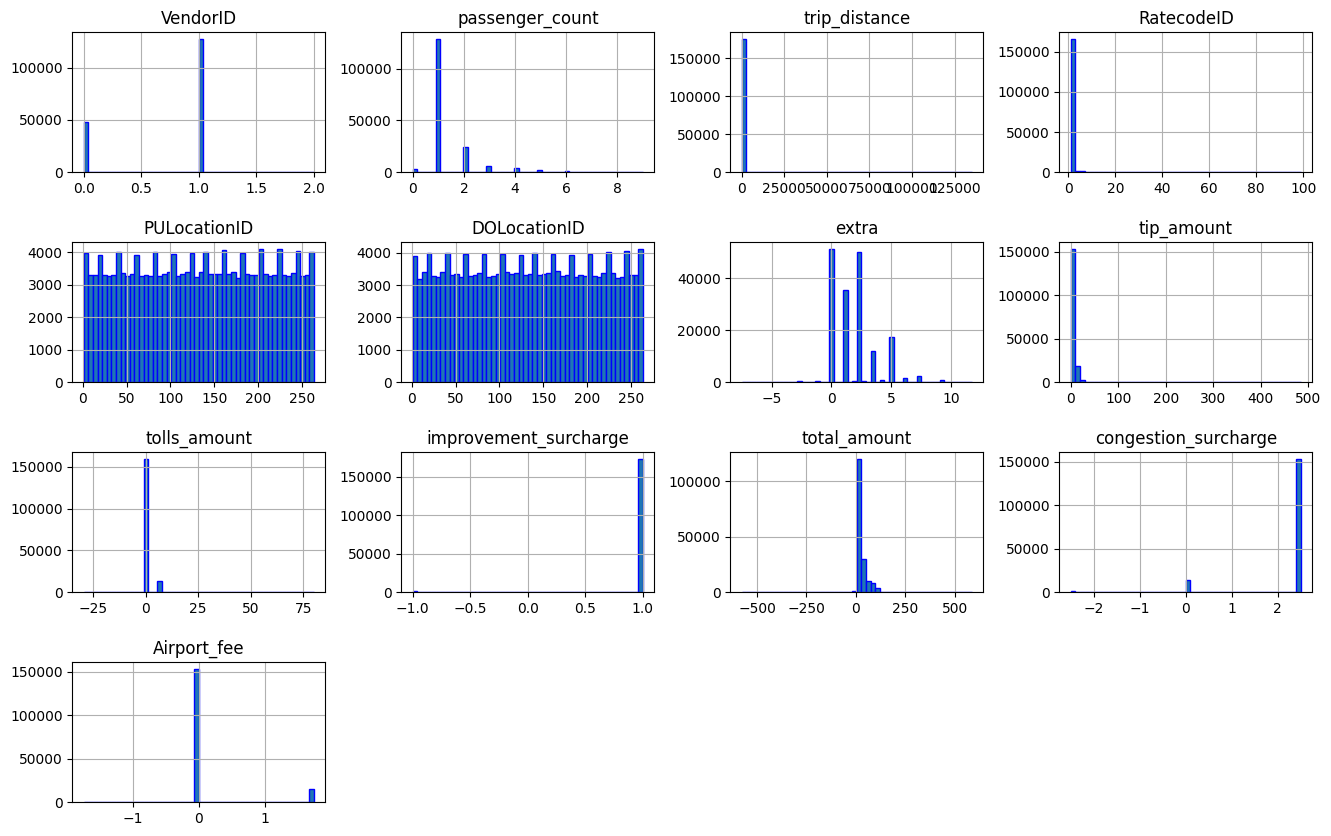

In [9]:
df.hist(bins = 50, edgecolor = 'blue', figsize=(16,10))
plt.subplots_adjust(hspace = 0.5,wspace = 0.3)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


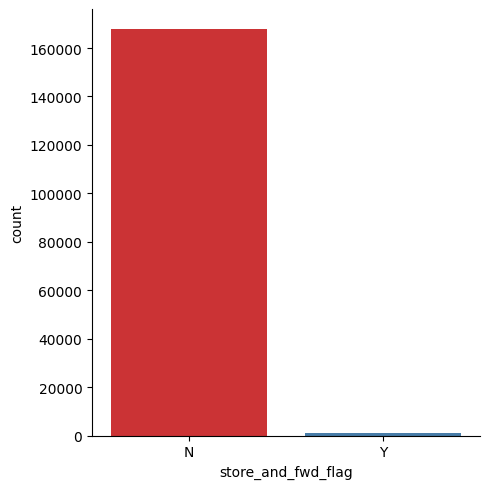

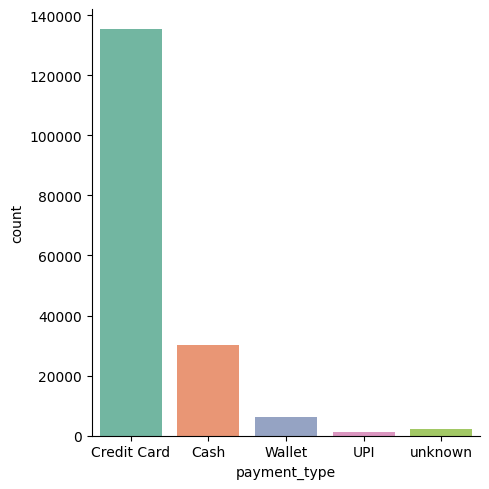

In [10]:
sns.catplot(data=df, x='store_and_fwd_flag', kind='count', palette='Set1')
sns.catplot(data=df, x='payment_type', kind='count',palette='Set2')

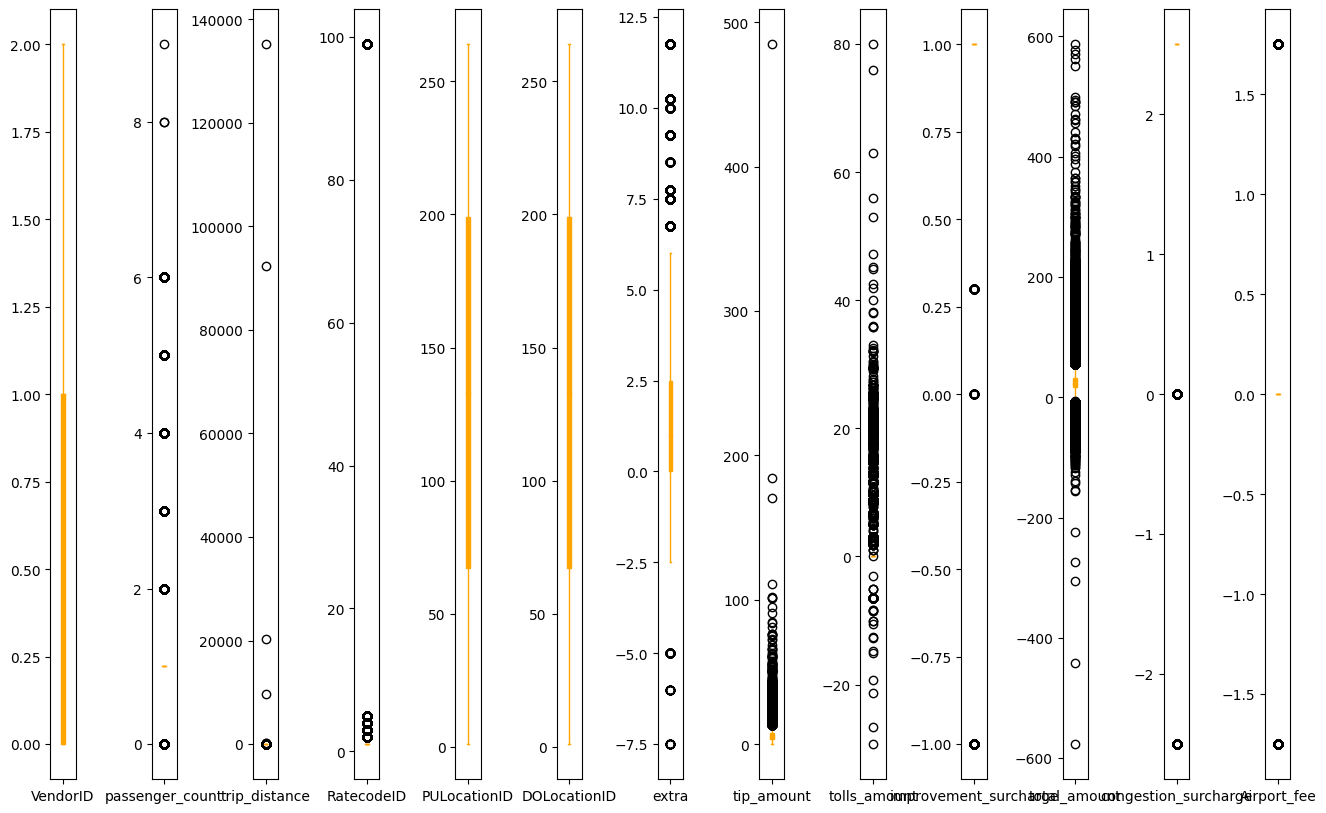

In [11]:
df.plot(kind='box',sharey = False, subplots=True, color='orange',figsize=(16,10),patch_artist=True,return_type='both')
plt.subplots_adjust(wspace = 3)
plt.show()

/tmp/ipykernel_21/1963203413.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_amount, bins = 200, color = 'firebrick', ax = ax)


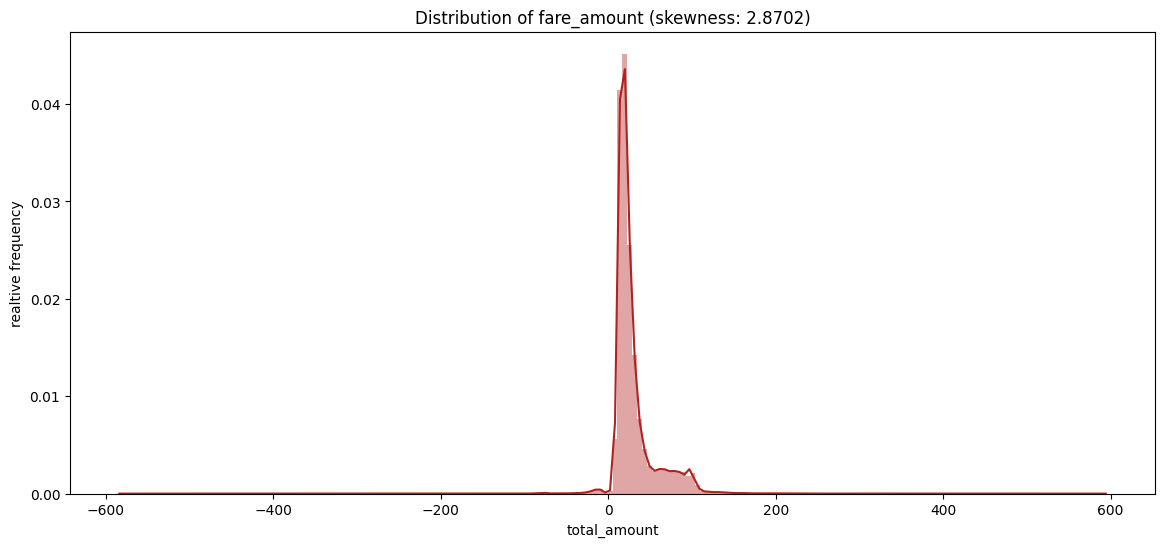

In [12]:

# Distrubution of target variable with skewness
fig, ax = plt.subplots(figsize = (14,6))
sns.distplot(df.total_amount, bins = 200, color = 'firebrick', ax = ax)
ax.set_title('Distribution of fare_amount (skewness: {:0.5})'.format(df.total_amount.skew()))
ax.set_ylabel('realtive frequency')
plt.show()

In [13]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], infer_datetime_format=True)
dt['tpep_pickup_datetime'] = pd.to_datetime(dt['tpep_pickup_datetime'], infer_datetime_format=True)
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], infer_datetime_format=True)
dt['tpep_dropoff_datetime'] = pd.to_datetime(dt['tpep_dropoff_datetime'], infer_datetime_format=True)

/tmp/ipykernel_21/67776436.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], infer_datetime_format=True)
/tmp/ipykernel_21/67776436.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dt['tpep_pickup_datetime'] = pd.to_datetime(dt['tpep_pickup_datetime'], infer_datetime_format=True)
/tmp/ipykernel_21/67776436.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pyda

In [14]:
df['time_difference_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds().abs()
dt['time_difference_minutes'] = (dt['tpep_dropoff_datetime'] - dt['tpep_pickup_datetime']).dt.total_seconds().abs()

In [15]:
columns_to_drop = ['tpep_pickup_datetime' ,'tpep_dropoff_datetime' ,'store_and_fwd_flag']
df = df.drop(columns=columns_to_drop)
dt=dt.drop(columns=columns_to_drop)

In [16]:
df['passenger_count'].fillna(df['passenger_count'].median() ,inplace=True)
dt['passenger_count'].fillna(dt['passenger_count'].median() ,inplace=True)

In [17]:
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(),inplace=True)
dt['congestion_surcharge'].fillna(dt['congestion_surcharge'].median() ,inplace=True)
df['Airport_fee'].fillna( 0,inplace=True)
dt['Airport_fee'].fillna(0 ,inplace=True)
df['RatecodeID'].fillna(df['RatecodeID'].median(),inplace=True)
dt['RatecodeID'].fillna(dt['RatecodeID'].median() ,inplace=True)

**Encoding of Categorical Variable**

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

object_cols = df.select_dtypes(object).columns.tolist()

cat_enco = OneHotEncoder(sparse=False)
df_enco = cat_enco.fit_transform(df[object_cols])
dt_enco = cat_enco.fit_transform(dt[object_cols])
enco_df = pd.DataFrame(df_enco, columns=cat_enco.get_feature_names_out(object_cols))
enco_dt = pd.DataFrame(dt_enco, columns=cat_enco.get_feature_names_out(object_cols))


enco_df

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
174995,0.0,1.0,0.0,0.0,0.0
174996,1.0,0.0,0.0,0.0,0.0
174997,0.0,1.0,0.0,0.0,0.0
174998,0.0,1.0,0.0,0.0,0.0


In [19]:
df = df.drop(object_cols, axis=1)
#df =df.drop(['extra'], axis=1)
df = pd.concat([df, enco_df], axis=1)
dt = dt.drop(object_cols, axis=1)
#dt =dt.drop(['extra'], axis=1)
dt = pd.concat([dt, enco_dt], axis=1)


In [20]:
df.isnull().sum()

VendorID                    0
passenger_count             0
trip_distance               0
RatecodeID                  0
PULocationID                0
DOLocationID                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
Airport_fee                 0
time_difference_minutes     0
payment_type_Cash           0
payment_type_Credit Card    0
payment_type_UPI            0
payment_type_Wallet         0
payment_type_unknown        0
dtype: int64

In [21]:
X = df.drop(columns=['total_amount'])
y = df['total_amount']

In [22]:
from sklearn.preprocessing import RobustScaler

std_scalar = RobustScaler()

data_scaled= std_scalar.fit_transform(X)

X = pd.DataFrame(data_scaled , columns=X.columns)

In [23]:
data_scaleed= std_scalar.fit_transform(dt)

dt= pd.DataFrame(data_scaleed , columns=dt.columns)

In [24]:
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.2 , random_state=42)

**Feature Engineering**

In [25]:
# Apply SelectKBest
# Choose the number of features to select
k_features = 6
params = {'max_depth': 10, 
         'max_features': 'auto', 
     'min_samples_leaf': 1, 
          'min_samples_split': 10}
# Use f_regression as the scoring function (you can choose a different one based on your problem)
select_kbest = SelectKBest(score_func=f_regression, k=k_features)
X_train_kbest = select_kbest.fit_transform(X_train, y_train)
X_test_kbest = select_kbest.transform(X_test)

# Train a model on the selected features
forest_reg = DecisionTreeRegressor(**params)
forest_reg.fit(X_train_kbest, y_train)

# Make predictions on the test set
y_pred = forest_reg.predict(X_test_kbest)


/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [26]:
selected_feature_indices = select_kbest.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]
print('Selected Features:', selected_feature_names.tolist())

Selected Features: ['extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']


In [27]:
#from sklearn.feature_selection import SelectFromModel

In [28]:
#sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
#sel.fit(X_train, y_train)

In [29]:
#sel.get_support()

In [30]:
#selected_feat= X_train.columns[(sel.get_support())]
#len(selected_feat)

In [31]:
#X_train.hist(bins=50 , figsize=(15 , 15))

**MODEL 1
Linear Regreesion**

In [32]:
# Train and predict using linear regression
from sklearn.linear_model import LinearRegression

# Instantiate linear regression object
linear_reg = LinearRegression()

# Train with the objt
linear_reg.fit(X_train, y_train)

# Make prediction
y_pred = linear_reg.predict(X_test)

In [33]:
y_pred.shape

(35000,)

In [34]:
r2_model1 = r2_score(y_test, y_pred)
print(f'Decision tree R-squared score: {r2_model1}')

Decision tree R-squared score: 0.723270407681273


In [35]:
mse_model1 = mean_squared_error(y_test, y_pred)
print(f"Random Forest Mean Squared Error: {mse_model1}")

Random Forest Mean Squared Error: 180.08403785327806


**Desicion Tree Regressor**

**Hypertunning**

In [36]:
#models =  DecisionTreeRegressor()

# Define hyperparameters to tune and their possible values
#param_grid = {
    #'max_depth': [10, 20, 30, 40],
    #'min_samples_split': [2, 10, 20],
    #'min_samples_leaf': [1, 5, 10],
   # 'max_features': ['auto', 'sqrt']
#}

In [37]:
# Use GridSearchCV to find the best hyperparameters
#grid_search = GridSearchCV(models, param_grid, cv=5)
#grid_search.fit(X_train, y_train)

# Get the best hyperparameters
#best_params = grid_search.best_params_
#print(f'Best Hyperparameters: {best_params}')

# Make predictions on the test set using the best model
#best_model = grid_search.best_estimator_
#predictions = best_model.predict(X_test)

In [38]:
params = { 'min_samples_split':10,
          'max_features': 'auto', 
          'min_samples_leaf': 15 , 
          
          }
tree_reg = DecisionTreeRegressor(**params)

# # Fit the model to the training data
tree_reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_features='auto', min_samples_leaf=15,
                      min_samples_split=10)

In [39]:
y_test_pred_dt = tree_reg.predict(X_test)
r2_model2 = r2_score(y_test, y_test_pred_dt)
print(f'Decision tree R-squared score: {r2_model2}')
mse_model2 = mean_squared_error(y_test, y_test_pred_dt)
print(f"Random Forest Mean Squared Error: {mse_model2}")

Decision tree R-squared score: 0.9432876491470197
Random Forest Mean Squared Error: 36.90602458588367


**Random Forest Regressor**


**Hypertunning**

In [40]:
# Initialize the model
# models = RandomForestRegressor()
# # # Define the hyperparameters grid to be searched
# # # param_grid = 
# # #     {'n_estimators': [90, 70, 110], 'max_features': [2, 4, 6, 8]}


In [41]:

#Use GridSearchCV to find the best hyperparameters
#grid_search = GridSearchCV(models, params, cv=5)
#grid_search.fit(X_train, y_train)

# Get the best hyperparameters
#best_params = grid_search.best_params_
#print(f'Best Hyperparameters: {best_params}')

# Make predictions on the test set using the best model
#best_model = grid_search.best_estimator_
#predictions = best_model.predict(X_test)

In [42]:

params = {'max_features': 6, 'n_estimators': 110}

forest_reg = RandomForestRegressor(**params)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_features=6, n_estimators=110)

In [43]:
y_pred_rf = forest_reg.predict(X_test)
mse_model3 = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_model3}")

r2_model3 = r2_score(y_test, y_pred_rf)
print(f'Random Forest R-squared score: {r2_model3}')

Random Forest Mean Squared Error: 30.14140145266281
Random Forest R-squared score: 0.9536826370879898


**Model 4 -XGBoost**

**Hypertuning**

In [44]:
#from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
#param_grid = {
    #'learning_rate': [0.01, 0.1, 0.2],
    #'max_depth': [3, 4, 5],
    #'n_estimators': [100, 200, 300]
#}

#grid_search = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
                           #param_grid=param_grid,
                           #cv=3,
                           #scoring='neg_mean_squared_error',
                           #verbose=2)

#grid_search.fit(X_train, y_train)

#best_params = grid_search.best_params_
#best_model = grid_search.best_estimator_

In [45]:
xgb_model = XGBRegressor(base_score=None, booster=None, callbacks=None,
            enable_categorical=False, learning_rate=0.1, max_depth=4,  n_estimators=200, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [46]:
y_pre = xgb_model.predict(X_test)

In [47]:
r2_model4 = r2_score(y_test, y_pre)
print(f'Random Forest R-squared score: {r2_model4}')
mse_model4 = mean_squared_error(y_test, y_pre)
print(f"Random Forest Mean Squared Error: {mse_model4}")

Random Forest R-squared score: 0.9527209650333689
Random Forest Mean Squared Error: 30.76721738089694


**Models Comparision**

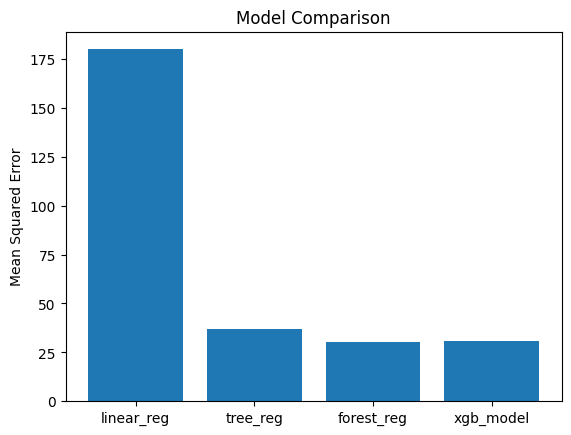

In [48]:
models = ['linear_reg','tree_reg', 'forest_reg', 'xgb_model']
mse_scores = [mse_model1, mse_model2, mse_model3, mse_model4]

plt.bar(models, mse_scores)
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison')
plt.show()

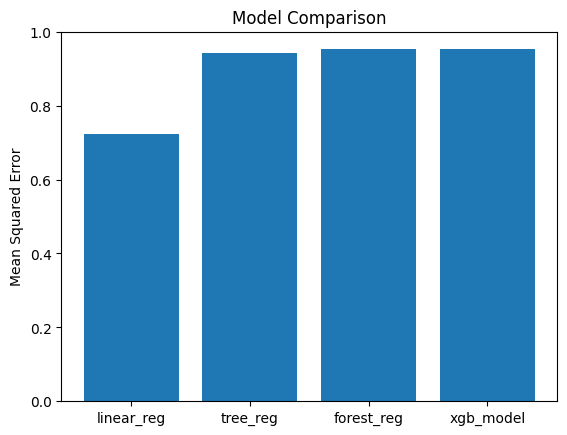

In [49]:
models = ['linear_reg','tree_reg', 'forest_reg', 'xgb_model']
r2_scores = [r2_model1, r2_model2, r2_model3, r2_model4]

plt.bar(models, r2_scores)
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison')
plt.show()

In [50]:
y_pred=forest_reg.predict(dt)

In [51]:
print(y_pred)

[38.00954545 26.88745455 17.01727273 ... 20.78181818 36.55836364
 17.76454545]


In [52]:
submission = pd.DataFrame(columns = ["ID","total_amount"])
submission["ID"] = [i for i in range(1,len(y_pred)+1)]
submission["total_amount"] = y_pred
submission.to_csv('submission.csv',index=False)